#SENTIMENT ANALYSIS OF LENOVO PRODUCTS BASED ON AMAZON REVIEWS



**Problem Statement:**
Helping Lenovo mobile brand in understanding the voice of the customer(VOC) by analyzing the reviews of their product on Amazon using sentiment analysis and then finding the topics that customers were frequently talking about.

**Scope of the model** : By getting an idea of what the client is particularly interested, and the different aspects that customers care about will be help the client and thereby the company to not just evaluate the current product, but also to get some direction for developing the product pipeline.

Steps included:

1. Importing necessary dependencies
2. Reading the dataset
3. Preprocessing
- Checking for null values and replacing/removing it.
- Cleaning the text
 - Converting to lowercase
 - Removing non-alpha characters(digits, punctuation, diacritics)
 -  Removing white spaces
- Word tokenization
- Removing the stopwords ( unnecessary words)
- Stemming / Lemmatization
4. Sentiment Analysis  
5. Visualization
7. Conclusion

##1. Importing necessary dependencies

In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import gensim
from gensim import corpora


## 2. Reading the dataset

In [ ]:
review_data = pd.read_csv('/content/K8 Reviews v0.2.csv')

##3. Preprocessing

In [ ]:
#Obtaining the first few records
review_data.head(5)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [ ]:
#Obtaining the dimension of the dataset
review_data.shape

(14675, 2)

Here we have 14k+ reviews

In [ ]:
#Basic information about the dataset
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


### a. Checking for null values and replacing/removing it.


In [ ]:
review_data.isnull().sum()

sentiment    0
review       0
dtype: int64

There are no null values

###b. Cleaning the text

-  Converting to LOWER case


In [ ]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


- Remove non-alpha characters(digits, punctuautions, diacritics)

In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True)
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


-  Removing white spaces


In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


###c.  Word tokenization


Tokenizing is the process of breaking down a text or a sequence of characters into smaller units called tokens. Tokens are typically words, but they can also be phrases, sentences, or other meaningful units, depending on the specific tokenization approach

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


###d. Removing the stopwords ( unnecessary words)

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, updates, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [ ]:
# Keeping records with more than single words
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)

###e. Stemming or Lemmatization


 Lemmatization reduces words to their base or dictionary form, which helps in treating different inflected forms of a word as the same.Lemmatization can help in reducing the vocabulary size and consolidating different forms of terms.

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,0,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."


### 4. Sentiment analysis

Now analyzing the sentiment of the customer review, whetehr it is positive or negative.

This analysis is performed by using natural language processing algorithms and machine learning from the model ‘Reviews-Sentiment-Analysis’ trained by Kaludi, allowing businesses to gain valuable insights into customer satisfaction and improve their products and services accordingly.

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00


In [ ]:
import transformers

In [ ]:
pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline#Importing the pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
model_name = pipeline(model="Kaludi/Reviews-Sentiment-Analysis")

In [ ]:
# Convert the dataset to a list of string representations
strings = ['"' + sentence + '"' for sentence in review_data['review']]

# Print the resulting list of strings
#for string in strings:
 #   print(string)

In [ ]:
model_name(strings[5])

[{'label': 'Negative', 'score': 0.9763039946556091}]

In [ ]:
model_name(strings[0])

[{'label': 'Positive', 'score': 0.9617423415184021}]

In [ ]:
model_name(strings[1400])

[{'label': 'Negative', 'score': 0.7396126985549927}]

In [ ]:
model_name(strings[0:10])

[{'label': 'Positive', 'score': 0.9617423415184021},
 {'label': 'Negative', 'score': 0.9909391403198242},
 {'label': 'Positive', 'score': 0.9099892973899841},
 {'label': 'Negative', 'score': 0.9836180806159973},
 {'label': 'Negative', 'score': 0.9867995381355286},
 {'label': 'Negative', 'score': 0.9763039946556091},
 {'label': 'Positive', 'score': 0.7170698046684265},
 {'label': 'Positive', 'score': 0.9672001600265503},
 {'label': 'Negative', 'score': 0.9741594791412354},
 {'label': 'Positive', 'score': 0.6527968645095825}]

In [ ]:
# Initialize counters
positive_count = 0
negative_count = 0

# Iterate over the dataset
for sentence in strings:
    # Perform sentiment analysis prediction for the current sentence using the pipeline
    prediction = model_name(sentence)[0]

    # Extract the predicted sentiment label
    sentiment_label = prediction["label"]

    # Increment the respective counters based on the predicted label
    if sentiment_label == "Positive":
        positive_count += 1
    elif sentiment_label == "Negative":
        negative_count += 1

# Print the counts
print(f"Positive count: {positive_count}")
print(f"Negative count: {negative_count}")


Positive count: 8846
Negative count: 4106


Now to understand which and all topics are the reason for the negative reviews, we need to get the topics that are frequently used.

In [ ]:

word_list = []
for words in review_data['clean_review']:
  word_list.extend(words)

In [ ]:
word_string = ' '.join(word_list)

In [ ]:
import os
from wordcloud import WordCloud

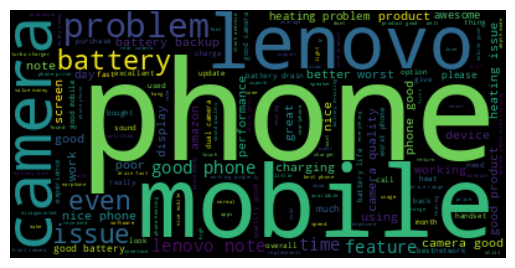

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud().generate(word_string)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Here the obtained word cloud shows the frequently used topics in the whole reviews.

###Inference
- People were more talking about phone/mobiles other than the laptops and tabs of lenovo.
- People raised the word "problem", "battery", "issue", "working", "camera quality", "backup support","time", "display" etc.
- This refers to the main concerns of the customers with lenova brand products.
- It is also seen that there are words like "good", "great", "even","feature" etc in the word cloud which refers to the positive comments in the reviews.


In [ ]:

# Bar Chart of Word Frequencies
word_frequencies = wordcloud.process_text(word_string)
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
top_words = [word[0] for word in sorted_word_frequencies[:15]]
word_counts = [word[1] for word in sorted_word_frequencies[:15]]


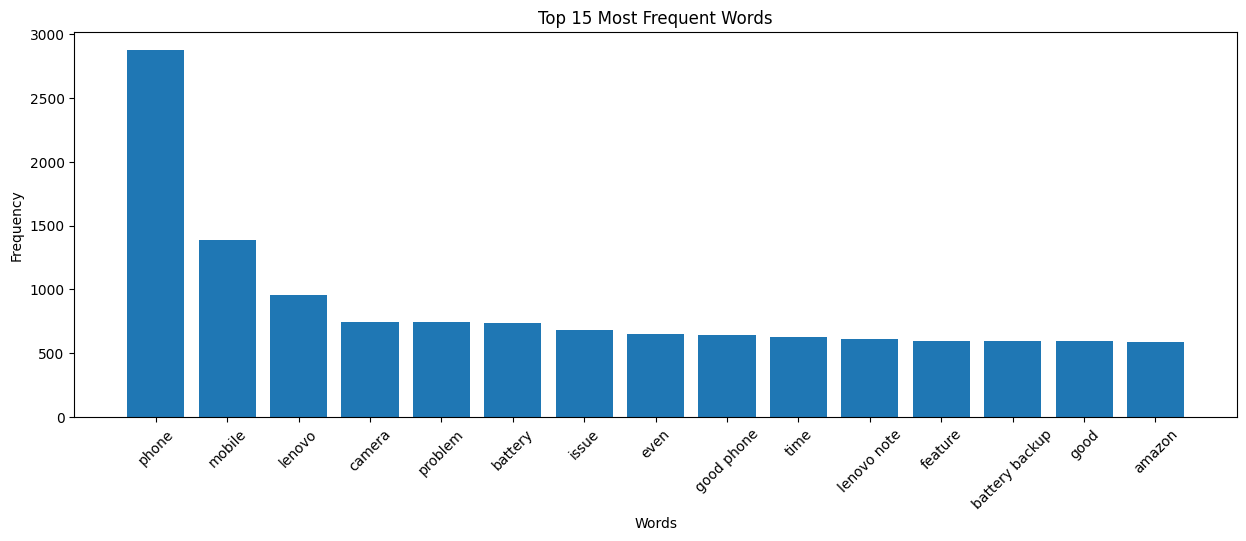

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(top_words, word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


These are the top 15 topics that the customers referred frequently.

In [ ]:
import plotly.express as px

# Prepare data for tree map
sizes = [word_count for word, word_count in sorted_word_frequencies[:10]]
labels = [word for word, word_count in sorted_word_frequencies[:10]]

# Create a tree map figure
fig = px.treemap(names=labels, parents=[""] * len(labels), values=sizes)

# Customize the appearance of the tree map
fig.update_layout(title='Top 10 Most Frequent Words - Tree Map')

# Display the tree map
fig.show()


### 6. Conclusion

- Since the most frequently used topic is "phone", the customers are having more problems with the mobile phone products of Lenovo.

- Also the "camera", "battery", and "time" is also frequently used topic.

- So the company can improve their mobile products by improving in these aspects.